[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hasin\AppData\Roaming\nltk_data...
C:\Users\hasin\AppData\Local\Temp\ipykernel_10996\4035838047.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review'].fillna('', inplace=True)


                                        product_name product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   neutral  
Accuracy: 0.8965
positive 

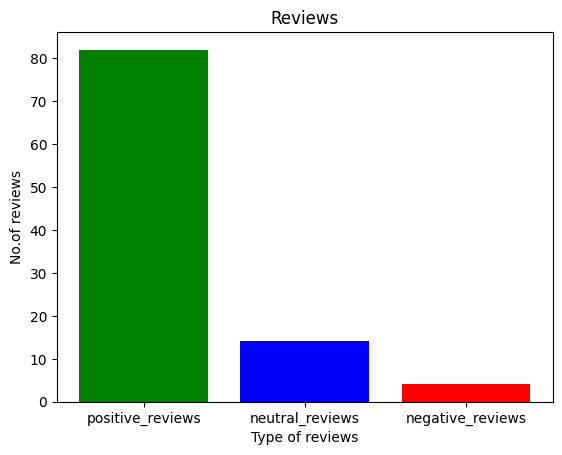

In [7]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
# nltk.download('vader_lexicon')

def analyze_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores

df=pd.read_csv("Dataset-SA.csv")
df['Review'].fillna('', inplace=True)
print(df.head())
x_train,x_test,y_train,y_test=train_test_split(df['Review'],df['Sentiment'],test_size=0.2,random_state=42)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
df=pd.read_csv(r"C:\Users\hasin\OneDrive\Desktop\book1.csv")

positive_reviews=neutral_reviews=negative_reviews=0

for row in df.itertuples():
    sentiment_scores=analyze_sentiment(str(row[5]))
    if sentiment_scores['compound']>=0.05:
        positive_reviews+=1
    elif sentiment_scores['compound']>=-0.05:
        neutral_reviews+=1
    else:
        negative_reviews+=1

print(f"positive reviews={positive_reviews} ,negative reviews={negative_reviews} ,neutral reviews={neutral_reviews}")

x=[ "positive_reviews" , "neutral_reviews" , "negative_reviews" ]
y=[ positive_reviews , neutral_reviews , negative_reviews ]

plt.bar( x[0], y[0], color='green')
plt.bar( x[1], y[1], color='blue')
plt.bar( x[2], y[2], color='red')

plt.xlabel('Type of reviews')
plt.ylabel('No.of reviews')
plt.title('Reviews')
# plt.legend()
plt.show()